In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
final_df = pd.read_csv('C:/Users/Utente/Desktop/project-work/all_data/all-data-best-city.csv', index_col=0)

In [3]:
final_df.head()

,rank_cost_living,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,rank_safety,safety_index,pollution_index,rank_traffic,exp_trffic_min_index
0,11,Honolulu,80.4,74.4,United States,25.441667,1.837220,162,52.6,37.0,41,1959.5
1,14,Seattle,83.4,108.4,United States,11.316667,5.142662,105,45.7,34.7,23,4247.9
2,16,Canberra,69.1,69.1,Australia,13.141667,5.418396,297,72.0,26.1,45,2654.2
3,17,Adelaide,64.6,67.3,Australia,17.208333,4.416798,262,66.7,27.1,32,3409.3
4,19,Boston,82.0,106.6,United States,12.063636,8.341855,215,59.6,32.3,25,4300.5


In [4]:
final_df.columns

Index(['rank_cost_living', 'city_ascii', 'cost_live_rent_index',
       'purchase_pow_index', 'country', 'mean_tmp', 'std_dev_temp',
       'rank_safety', 'safety_index', 'pollution_index', 'rank_traffic',
       'exp_trffic_min_index'],
      dtype='object')

In [5]:
final_df = final_df.drop(['rank_cost_living', 'rank_traffic','rank_safety'], axis=1)
final_df.head()

,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,safety_index,pollution_index,exp_trffic_min_index
0,Honolulu,80.4,74.4,United States,25.441667,1.837220,52.6,37.0,1959.5
1,Seattle,83.4,108.4,United States,11.316667,5.142662,45.7,34.7,4247.9
2,Canberra,69.1,69.1,Australia,13.141667,5.418396,72.0,26.1,2654.2
3,Adelaide,64.6,67.3,Australia,17.208333,4.416798,66.7,27.1,3409.3
4,Boston,82.0,106.6,United States,12.063636,8.341855,59.6,32.3,4300.5


In [6]:
final_df['rank_rent'] = final_df['cost_live_rent_index'].rank(ascending=False) #the lowest index has the higher score 
final_df['rank_purchase_pow'] = final_df['purchase_pow_index'].rank(ascending=True) #the lowest index has the lowest score
final_df['rank_safety'] = final_df['safety_index'].rank(ascending=True) #the lowest index has the lowest score 
final_df['rank_pollution'] = final_df['pollution_index'].rank(ascending=False) #the lowest index has the higher score
final_df['rank_traffic'] = final_df['exp_trffic_min_index'].rank(ascending=False)

final_df.head()

,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,safety_index,pollution_index,exp_trffic_min_index,rank_rent,rank_purchase_pow,rank_safety,rank_pollution,rank_traffic
0,Honolulu,80.4,74.4,United States,25.441667,1.837220,52.6,37.0,1959.5,5.0,69.0,56.0,84.0,48.0
1,Seattle,83.4,108.4,United States,11.316667,5.142662,45.7,34.7,4247.9,2.0,110.0,31.5,87.5,23.0
2,Canberra,69.1,69.1,Australia,13.141667,5.418396,72.0,26.1,2654.2,14.0,62.0,105.0,113.0,35.0
3,Adelaide,64.6,67.3,Australia,17.208333,4.416798,66.7,27.1,3409.3,22.0,59.0,92.0,110.0,29.0
4,Boston,82.0,106.6,United States,12.063636,8.341855,59.6,32.3,4300.5,4.0,108.0,77.0,96.0,22.0


In [7]:
#final_df.to_csv('/mnt/c/Users/ashut/Downloads/check_ranking.csv')
final_df.to_csv('C:/Users/Utente/Desktop/project-work/all_datacheck_ranking1.csv',sep=",")


In [8]:
# Define variables for best mean temperature and best std deviation value
best_mean_tmp = 20
best_std_dev_tmp = 13

# Testing for temperature 
final_df['mean_tmp_diff_from_best'] = abs(best_mean_tmp - final_df['mean_tmp'])
final_df['tmp_std_dev_diff_from_best'] = abs(best_std_dev_tmp - final_df['std_dev_temp'])
#two ranking, one for average temperature, one for stand. dev.
final_df['rank_mean_tmp'] = final_df['mean_tmp_diff_from_best'].rank(ascending=True)
final_df['rank_std_dev_tmp'] = final_df['tmp_std_dev_diff_from_best'].rank(ascending=True)

final_df.head()

,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,safety_index,pollution_index,exp_trffic_min_index,rank_rent,rank_purchase_pow,rank_safety,rank_pollution,rank_traffic,mean_tmp_diff_from_best,tmp_std_dev_diff_from_best,rank_mean_tmp,rank_std_dev_tmp
0,Honolulu,80.4,74.4,United States,25.441667,1.837220,52.6,37.0,1959.5,5.0,69.0,56.0,84.0,48.0,5.441667,11.162780,56.0,112.0
1,Seattle,83.4,108.4,United States,11.316667,5.142662,45.7,34.7,4247.9,2.0,110.0,31.5,87.5,23.0,8.683333,7.857338,101.0,74.0
2,Canberra,69.1,69.1,Australia,13.141667,5.418396,72.0,26.1,2654.2,14.0,62.0,105.0,113.0,35.0,6.858333,7.581604,70.0,64.0
3,Adelaide,64.6,67.3,Australia,17.208333,4.416798,66.7,27.1,3409.3,22.0,59.0,92.0,110.0,29.0,2.791667,8.583202,28.0,87.0
4,Boston,82.0,106.6,United States,12.063636,8.341855,59.6,32.3,4300.5,4.0,108.0,77.0,96.0,22.0,7.936364,4.658145,90.0,14.0


In [9]:
final_df.columns

Index(['city_ascii', 'cost_live_rent_index', 'purchase_pow_index', 'country',
       'mean_tmp', 'std_dev_temp', 'safety_index', 'pollution_index',
       'exp_trffic_min_index', 'rank_rent', 'rank_purchase_pow', 'rank_safety',
       'rank_pollution', 'rank_traffic', 'mean_tmp_diff_from_best',
       'tmp_std_dev_diff_from_best', 'rank_mean_tmp', 'rank_std_dev_tmp'],
      dtype='object')

In [10]:
wht_dict = {"wt_mean_tmp":0.5,"wt_std_dev":0.5,"wt_safety":0.8,"wt_pollution":0.4,"wt_cost_living":0.7,"wt_traffic":0.4,"wt_purchase_pow":0.6}

scores = []
for index, row in final_df.iterrows():
    s = (( row['rank_rent']*wht_dict['wt_cost_living'] + \
        row['rank_mean_tmp']*wht_dict['wt_mean_tmp'] + \
            row['rank_std_dev_tmp']*wht_dict['wt_std_dev'] + \
                row['rank_safety']*wht_dict['wt_safety'] +\
                    row['rank_pollution']*wht_dict['wt_pollution'] +\
                        row['rank_traffic']*wht_dict['wt_traffic'] +\
                            row['rank_purchase_pow']*wht_dict['wt_purchase_pow']) / sum(wht_dict.values()))
    scores.append(s)

finding_home_df = final_df[['city_ascii','country']].copy()

finding_home_df['final_score'] = scores

finding_home_df = finding_home_df.sort_values(by=['final_score'], ascending=False)

finding_home_df.head()

,city_ascii,country,final_score
78,Muscat,Oman,95.410256
52,Amsterdam,Netherlands,91.628205
63,Tallinn,Estonia,91.461538
59,Edinburgh,United Kingdom,90.538462
58,Vienna,Austria,90.128205


In [11]:
finding_home_df.to_csv('C:/Users/Utente/Desktop/project-work/final_ranking.csv',sep=",")

In [19]:
finding_home_df['country'] = finding_home_df['country'].str.strip()

In [20]:
print(final_df[final_df['city_ascii'] == "Lagos"].to_dict())

{'city_ascii': {123: 'Lagos'}, 'cost_live_rent_index': {123: 21.1}, 'purchase_pow_index': {123: 11.5}, 'country': {123: 'Nigeria'}, 'mean_tmp': {123: 26.808333333333334}, 'std_dev_temp': {123: 1.2176417844142482}, 'safety_index': {123: 32.0}, 'pollution_index': {123: 89.4}, 'exp_trffic_min_index': {123: 26627.2}, 'rank_rent': {123: 116.0}, 'rank_purchase_pow': {123: 1.0}, 'rank_safety': {123: 8.0}, 'rank_pollution': {123: 7.0}, 'rank_traffic': {123: 1.0}, 'mean_tmp_diff_from_best': {123: 6.808333333333334}, 'tmp_std_dev_diff_from_best': {123: 11.782358215585752}, 'rank_mean_tmp': {123: 68.0}, 'rank_std_dev_tmp': {123: 116.0}}


C:\Users\Utente\AppData\Local\Temp\ipykernel_14604\203593770.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


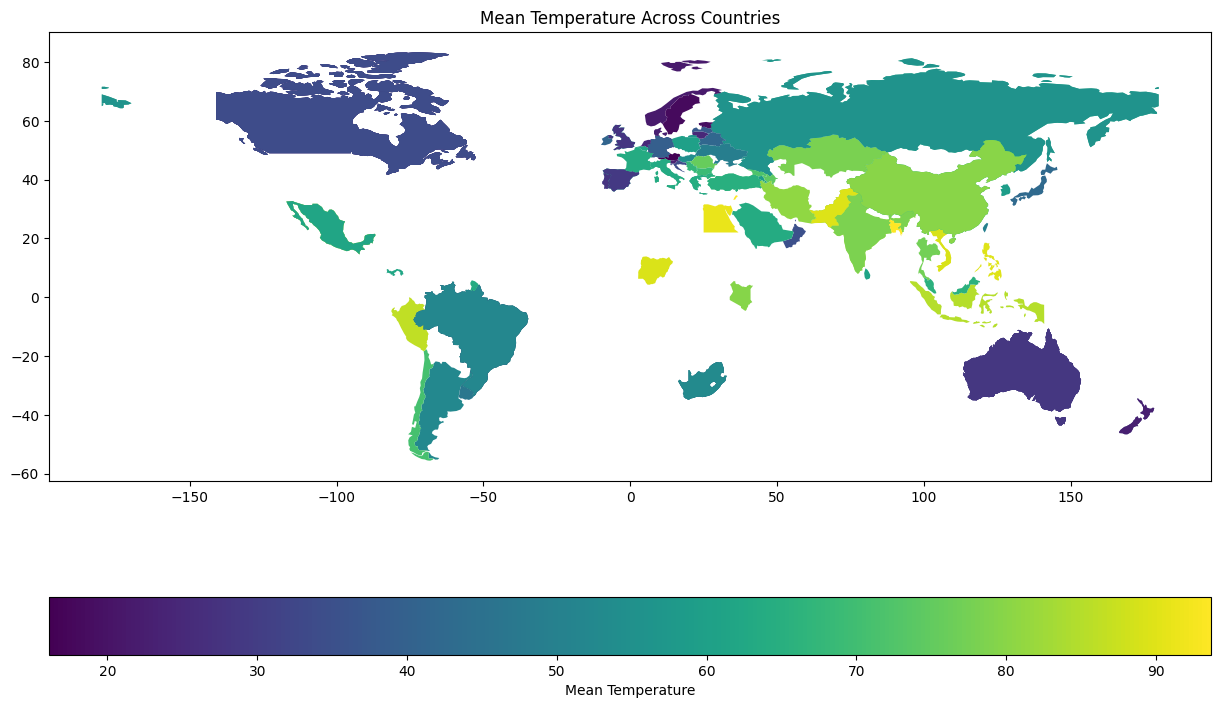

In [23]:
#%pip install geopandas
import matplotlib.pyplot as plt
import geopandas as gpd


# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Your data (mean temperatures per country)
data = {
    'Country': final_df['country'].to_list(),  # Replace with your countries
    'Mean_Temperature': final_df['pollution_index'].to_list()  # Replace with your mean temperatures
}

# Merge world map with data
world_data = world.merge(pd.DataFrame(data), how='left', left_on='name', right_on='Country')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_data.plot(column='Mean_Temperature', ax=ax, legend=True,
                legend_kwds={'label': "Mean Temperature", 'orientation': "horizontal"})
plt.title('Mean Temperature Across Countries')
plt.show()